In [183]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter, ImageOps
#from PIL import ImageFile
import os, glob
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
ImageFile.LOAD_TRUNCATED_IMAGES = True

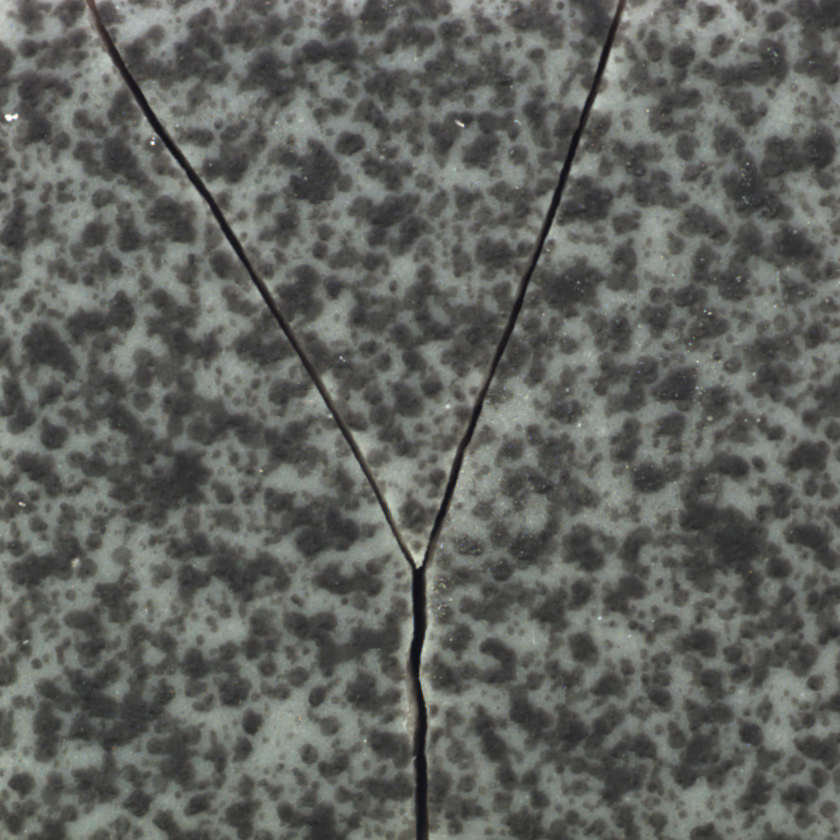

In [2]:
from IPython.display import Image,display_png
display_png(Image("./crack/001.png"))

## ひび割れ画像の生成

In [156]:
files = ["crack"]
ms = []

for i in files:
    photo_d = "./" + i
    photo = glob.glob(photo_d + "/*.png")
    #print(photo)
    
    for j in photo:
        im = Image.open(j)
        print(j[8:11])
        
        im = im.transpose(Image.FLIP_LEFT_RIGHT)
        im.save('./crack_2/lr_{}.png'.format(j[8:11]))
        im = im.transpose(Image.FLIP_TOP_BOTTOM)
        im.save('./crack_2/top_{}.png'.format(j[8:11]))
        im = im.transpose(Image.ROTATE_90)
        im.save('./crack_2/r90_{}.png'.format(j[8:11]))
        im = im.transpose(Image.ROTATE_180)
        im.save('./crack_2/r180_{}.png'.format(j[8:11]))
        im = im.transpose(Image.ROTATE_270)
        im.save('./crack_2/r270_{}.png'.format(j[8:11]))
        

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017


In [157]:
from PIL import ImageEnhance

classes = ["normal_4", "crack_2"]
num_classes = len(classes)
image_size = 120
num_testdata = 27

X_train = []
X_test = []
y_train = []
y_test = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.png")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        
        image = image.filter(ImageFilter.UnsharpMask(radius=30, percent=50, threshold=50))
        
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        
        if i < num_testdata:
            X_test.append(data)
            y_test.append(index)
        else:
            X_train.append(data)
            y_train.append(index)
                
    
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./normal_ab.npy", xy)

In [158]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

162
54
162
54


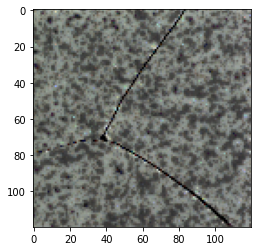

In [160]:
plt.imshow(X_train[160])
plt.show()

In [130]:
y_train[10]

0

In [128]:
y_train[20]

1

# データの読み込み関数

In [161]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils
import keras
import numpy as np

classes = ["normal_4", "crack_2"]

def load_data():
    X_train, X_test, y_train, y_test = np.load("./normal_ab.npy", allow_pickle = True)
    
    X_train = X_train.astype("float") / 255
    X_test = X_test.astype("float") / 255
    
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)
    
    return X_train, X_test, y_train, y_test

In [162]:
X_train, X_test, y_train, y_test = load_data()

In [163]:
def train(X, y, X_test, y_test):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2 ,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2 ,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    #opt = RMSprop(lr = 0.00005, decay = 1e-6)
    opt = Adam(lr = 0.001, decay = 1e-6)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    hist = model.fit(X, y, batch_size = 20, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
    
    model.save('./cnn.h5')
    
    return hist

In [164]:
hist = train(X_train, y_train, X_test, y_test)

Train on 162 samples, validate on 54 samples
Epoch 1/10
162/162 [==============================] - 9s 55ms/step - loss: 0.8869 - acc: 0.5123 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/10
162/162 [==============================] - 6s 38ms/step - loss: 0.6939 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 3/10
162/162 [==============================] - 6s 37ms/step - loss: 0.6929 - acc: 0.5000 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 4/10
162/162 [==============================] - 6s 37ms/step - loss: 0.6927 - acc: 0.5000 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 5/10
162/162 [==============================] - 6s 38ms/step - loss: 0.6997 - acc: 0.5000 - val_loss: 0.6833 - val_acc: 0.5000
Epoch 6/10
162/162 [==============================] - 6s 40ms/step - loss: 0.6786 - acc: 0.5000 - val_loss: 0.6514 - val_acc: 0.5000
Epoch 7/10
162/162 [==============================] - 6s 39ms/step - loss: 0.5577 - acc: 0.5000 - val_loss: 0.4330 - val_acc: 0.5000
Epoch 8/10
162/162 [====

# 性能評価

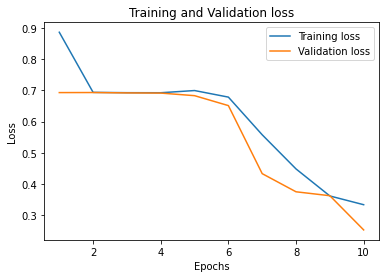

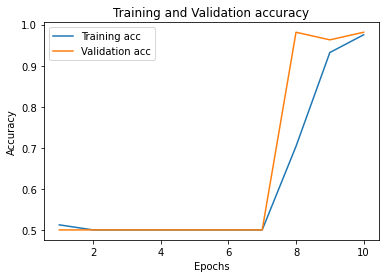

In [182]:
epochs = range(1, len(hist.history['acc']) + 1)

plt.plot(epochs, hist.history['loss'], label='Training loss', ls='-') #損失値
plt.plot(epochs, hist.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, hist.history['acc'],  label='Training acc') #正解率
plt.plot(epochs, hist.history['val_acc'], label="Validation acc")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [180]:
hist.history

{'val_loss': [0.6931672670223095,
  0.6933671125659236,
  0.6921691166030036,
  0.6916129015110157,
  0.6832924352751838,
  0.6514068665327849,
  0.43298151509629357,
  0.3747703993210086,
  0.36218761735492283,
  0.2524003558964641],
 'val_acc': [0.49999999116968225,
  0.49999999116968225,
  0.49999999116968225,
  0.49999999116968225,
  0.49999999116968225,
  0.49999999116968225,
  0.49999999116968225,
  0.9814814748587432,
  0.9629629519250658,
  0.9814814748587432],
 'loss': [0.8868710185274665,
  0.6939073514055323,
  0.692883120642768,
  0.6927021418088748,
  0.6997312918121432,
  0.6786495697351149,
  0.5577446906654923,
  0.4481468634840883,
  0.36138694521821574,
  0.3333097126013809],
 'acc': [0.5123456804840653,
  0.5,
  0.5000000022075795,
  0.4999999963207009,
  0.5000000003679299,
  0.5,
  0.4999999963207009,
  0.7037037007602645,
  0.9320987639603792,
  0.9753086360884301]}

In [166]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

score=model.evaluate(X_test, y_test)
print('test loss:', score[0])
print('test acc:', score[1])

score2=model.evaluate(X_train, y_train)
print('train loss:', score2[0])
print('train acc:', score2[1])

pred = model.predict_classes(X_test)
label = np.argmax(y_test, axis=1)
predict_classes = pred.reshape(-1, 1)
confusion_matrix(label, pred)

label = np.argmax(y_test, axis=1)
precision_score(label, pred)
print(f1_score(label, pred))

print(confusion_matrix(label, pred))

54/54 [==============================] - 1s 27ms/step
test loss: 0.25240034982562065
test acc: 0.9814814748587432
162/162 [==============================] - 2s 12ms/step
train loss: 0.24079575141270973
train acc: 1.0
0.9811320754716981
[[27  0]
 [ 1 26]]


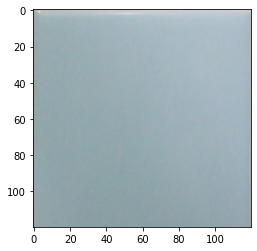

[[0.6313989 0.3686011]]
>>> 正常


In [178]:
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (120, 120)



testpic     = "./230.png"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    
    img = img.filter(ImageFilter.UnsharpMask(radius=30, percent=50, threshold=50))
    
    img = img.resize(imsize)
    img = np.asarray(img)
    img = img / 255.0
    return img

plt.imshow(img)
plt.show()

model = load_model(keras_param)
img = load_image(testpic)
pred = model.predict(np.array([img]))
print(pred)
prelabel = np.argmax(pred, axis = 1)

if prelabel == 0:
    print(">>> 正常")
elif prelabel == 1:
    print(">>> 異常")